<a href="https://colab.research.google.com/github/KeitaW/Colab-Notebooks/blob/master/200830_interval_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

区間推定： 確率分布のパラメタの真の推定値が含まれる区間を確率的に推定すること．

95%信頼区間: ”サンプルを$n$個を用いて95%信頼区間を推定する"というプロセスを$100$回繰り返したとする．結果として$100$個の異なる95%信頼区間が得られる．パラメタの真の値はそのうちの$95$個の信頼区間の中に含まれる．


https://bellcurve.jp/statistics/course/8891.html#:~:text=%E3%80%8C95%25%E4%BF%A1%E9%A0%BC%E5%8C%BA%E9%96%93%E3%80%8D%E3%81%A8,%E3%81%8C%E3%80%81%E3%81%93%E3%82%8C%E3%81%AF%E9%96%93%E9%81%95%E3%81%84%E3%81%A7%E3%81%99%E3%80%82
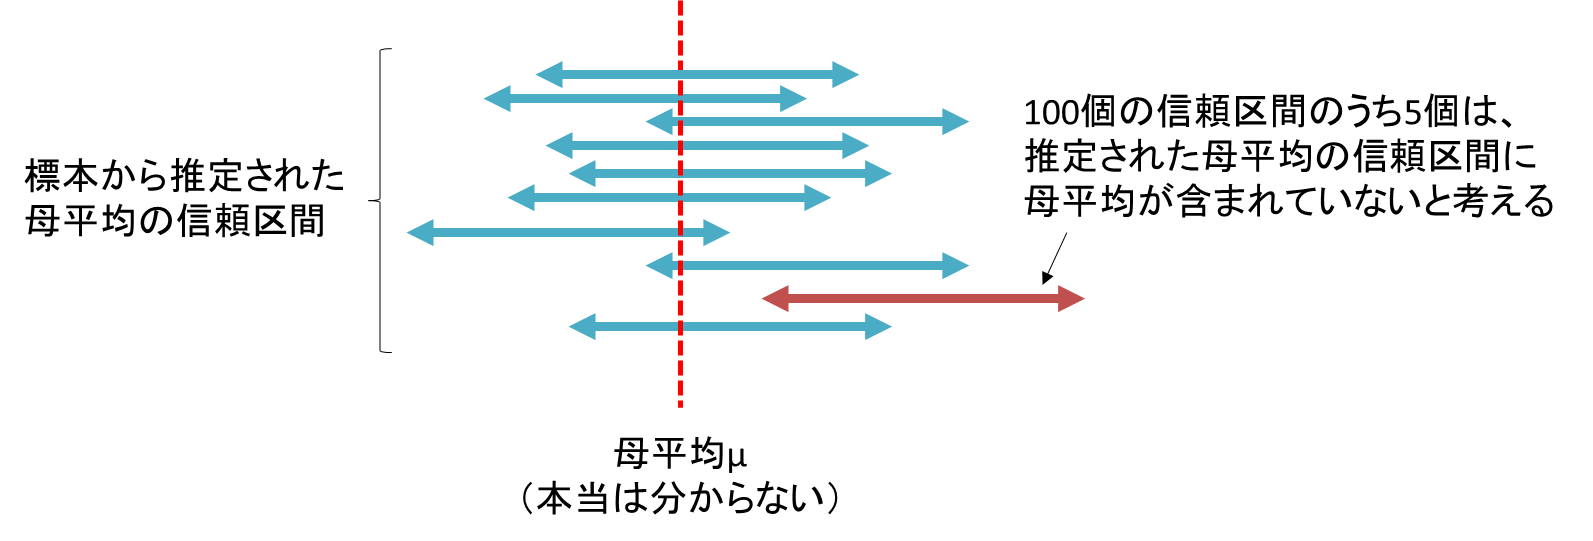

以下の例ではある確率分布の母平均$\mu$を推定する状況を考える．

# 大標本における区間推定
サンプルサイズ$n$が大きいときには中心極限定理を利用して． 区間推定ができる（後述のt分布を用いた区間推定のほうが実用的）．
中心極限定理によると
$$
P\left(a < \frac{n\bar{x} - n\mu}{\sqrt{n}\sigma} < b  \right) \approx \int_{a}^{b} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx
$$
と書ける．ただし$\bar{x}= \frac{1}{n} \sum_{i=1}^n x_i $

$$
a < \frac{n\bar{x} - n\mu}{\sqrt{n}\sigma} < b 
$$
を変形すると
$$
\mu + a \frac{\sigma}{\sqrt{n}} < \bar{x} < \mu + b \frac{\sigma}{\sqrt{n}} 
$$

ここで，$a=-1.96, b=1.96$としたとき右辺の積分の値が$0.95$になることに注意する

In [95]:
from sympy import Symbol, pi, exp, sqrt, integrate
from scipy.stats import norm, t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
x = Symbol('x')
float(integrate(1/sqrt(2.0*pi)*exp(-x**2/2), (x, -1.96, 1.96)))

0.950004209703559

$$
P\left(\bar{x} -1.96 \frac{\sigma}{\sqrt{n}} < \mu < \bar{x} + 1.96 \frac{\sigma}{\sqrt{n}}  \right) \approx \int_{-1.96}^{1.96} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx = 0.95
$$
ここで標準偏差$\sigma$もまた未知なので，不偏分散の平方根$std(x)$で置き換えると
$$
P\left(\bar{x} -1.96 \frac{std(x)}{\sqrt{n}} < \mu < \bar{x} + 1.96 \frac{std(x)}{\sqrt{n}}  \right) \approx \int_{-1.96}^{1.96} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx = 0.95
$$

実際

In [116]:
norm.ppf(0.975)

1.959963984540054

問題

平均0, 標準偏差1の正規分布の区間推定をしてみる

In [45]:
mean = 0
std = 1
lowers, uppers = [], []
n_samples = np.arange(start=1, stop=100, step=1)
for n_sample in n_samples:
  sample = np.random.normal(loc=mean, scale=std, size=n_sample)
  sample_mean = np.mean(sample)
  sample_std = np.std(sample)
  lowers.append(sample_mean  - 1.96 * sample_std / np.sqrt(n_sample))
  uppers.append(sample_mean  + 1.96 * sample_std / np.sqrt(n_sample))

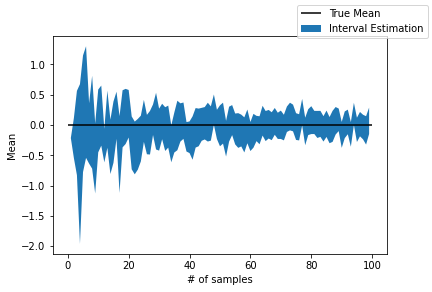

In [46]:
fig, ax = plt.subplots()
ax.hlines(mean, 0, 100, label="True Mean")
ax.fill_between(n_samples, lowers, uppers, label="Interval Estimation")
ax.set_xlabel("# of samples")
ax.set_ylabel("Mean")
fig.legend()

上記のようにこの方法はサンプルサイズ$n$が小さいときには誤差が大きいため，実用上は次に示す$t$分布が用いられる．

In [126]:
mean = 0
std = 1
lowers_norm, uppers_norm = [], []
lowers_t, uppers_t = [], []
n_samples = np.arange(start=2, stop=30, step=1)
for n_sample in n_samples:
  sample = np.random.normal(loc=mean, scale=std, size=n_sample)
  sample_mean = np.mean(sample)
  sample_std = np.std(sample)
  lowers_norm.append(sample_mean  - norm.ppf(0.975) * sample_std / np.sqrt(n_sample))
  uppers_norm.append(sample_mean  + norm.ppf(0.975)* sample_std / np.sqrt(n_sample))
  lowers_t.append(sample_mean  - t.ppf(0.975, df=n_sample-1) * sample_std / np.sqrt(n_sample))
  uppers_t.append(sample_mean  + t.ppf(0.975, df=n_sample-1) * sample_std / np.sqrt(n_sample))  

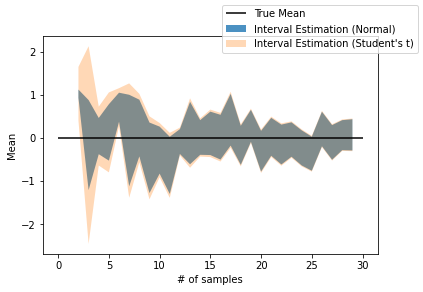

In [127]:
fig, ax = plt.subplots()
ax.hlines(mean, 0, 30, label="True Mean")
ax.fill_between(n_samples, lowers_norm, uppers_norm, label="Interval Estimation (Normal)", alpha=0.8)
ax.fill_between(n_samples, lowers_t, uppers_t, label="Interval Estimation (Student's t)", alpha=0.3)
ax.set_xlabel("# of samples")
ax.set_ylabel("Mean")
fig.legend()

t分布がサンプル数を増加させたときの極限として正規分布を含むことから，実用上は常にt分布を用いれば良いことがわかる．

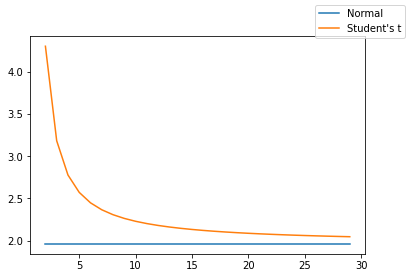

In [128]:
fig, ax = plt.subplots()
ax.plot(n_samples, norm.ppf(0.975) * np.ones_like(n_samples), label="Normal")
ax.plot(n_samples, [t.ppf(0.975, n_sample) for n_sample in n_samples], label="Student's t")
fig.legend()

つまり，正規分布では信頼区間を実際よりも狭く見積もってしまうことがわかる．